In [2]:
# importing libraries

import numpy as np
import pandas as pd

In [4]:
flipkart_df = pd.read_csv(r'D:\NCI Sem 1\Data Mining and Machine Learning\Project\Text Analysis\Dataset-SA.csv')
flipkart_df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [6]:
# examining the structure of the dataset
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [8]:
'''
pre-processing and data cleaning 
Step 1: Remove missing values if any
Step 2: Remove duplicates if any
Step 3: Remove special characters if any
Step 4: Standardize few columns
Step 5: Validate the Sentiment values
Step 6: Check for any outliers
'''
# Step 1: Remove missing values if any
missing_rows = flipkart_df.isnull().sum()
missing_rows

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [10]:
# Step 2: Remove duplicates if any
cleaned_df = flipkart_df.drop_duplicates()
cleaned_df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,terrific,good quality products,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [12]:
print("Total Duplicate Values:", len(flipkart_df) - len(cleaned_df))

Total Duplicate Values: 34375


In [14]:
# Text Pre-processing
# Step 3: Remove special characters if any
# Step 4: Standardize few columns

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# Preload the English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):                                        # Check if the text is a string
        text = str(text) if text is not None else ""
    text = text.lower()                                                  #Lowercasing
    text = re.sub(r'[^\x00-\x7F]+|[^a-zA-Z0-9\s]', '', text)             #Removing any special characters or numbers
    tokens = word_tokenize(text)                                         #Tokenization
    tokens = [word for word in tokens if word not in stop_words]         #Stopword Removal if any
    return ''.join(tokens)

# Defining columns to clean
columns_to_clean = ['product_name', 'Review', 'Summary']

for column in columns_to_clean:
    cleaned_df.loc[:, column] = cleaned_df[column].astype(str).apply(clean_text)
    
cleaned_df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,candes12lroompersonalaircoolerwhiteblackelegan...,3999,5,super,greatcoolerexcellentairflowpriceamazingunbelie...,positive
1,candes12lroompersonalaircoolerwhiteblackelegan...,3999,5,awesome,bestbudget2fitcoolernicecooling,positive
2,candes12lroompersonalaircoolerwhiteblackelegan...,3999,3,fair,qualitygoodpowerairdecent,positive
3,candes12lroompersonalaircoolerwhiteblackelegan...,3999,1,uselessproduct,badproductfan,negative
4,candes12lroompersonalaircoolerwhiteblackelegan...,3999,3,fair,okokproduct,neutral
...,...,...,...,...,...,...
205045,cellopack18opalwarecellodazzlelushfiestaopalwa...,1299,5,terrific,goodqualityproducts,positive
205046,cellopack18opalwarecellodazzlelushfiestaopalwa...,1299,5,classyproduct,beautifulsetnice,positive
205049,cellopack18opalwarecellodazzlelushfiestaopalwa...,1299,3,nice,nicefastdelivery,positive
205050,cellopack18opalwarecellodazzlelushfiestaopalwa...,1299,5,wow,awesomeproduct,positive


In [18]:
# Step 5: Validate the Sentiment values
valid_sentiments = {'positive', 'neutral', 'negative'}
invalid_sentiments = cleaned_df[~cleaned_df['Sentiment'].isin(valid_sentiments)]

print("Invalid Sentiments: ", invalid_sentiments)

Invalid Sentiments:  Empty DataFrame
Columns: [product_name, product_price, Rate, Review, Summary, Sentiment]
Index: []


In [20]:
from sklearn.preprocessing import LabelEncoder    
encoder = LabelEncoder()                           #Label Encoding Categorical data
cleaned_df = cleaned_df.assign(Encoded_Sentiment=encoder.fit_transform(cleaned_df['Sentiment']))
cleaned_df

,product_name,product_price,Rate,Review,Summary,Sentiment,Encoded_Sentiment
0,candes12lroompersonalaircoolerwhiteblackelegan...,3999,5,super,greatcoolerexcellentairflowpriceamazingunbelie...,positive,2
1,candes12lroompersonalaircoolerwhiteblackelegan...,3999,5,awesome,bestbudget2fitcoolernicecooling,positive,2
2,candes12lroompersonalaircoolerwhiteblackelegan...,3999,3,fair,qualitygoodpowerairdecent,positive,2
3,candes12lroompersonalaircoolerwhiteblackelegan...,3999,1,uselessproduct,badproductfan,negative,0
4,candes12lroompersonalaircoolerwhiteblackelegan...,3999,3,fair,okokproduct,neutral,1
...,...,...,...,...,...,...,...
205045,cellopack18opalwarecellodazzlelushfiestaopalwa...,1299,5,terrific,goodqualityproducts,positive,2
205046,cellopack18opalwarecellodazzlelushfiestaopalwa...,1299,5,classyproduct,beautifulsetnice,positive,2
205049,cellopack18opalwarecellodazzlelushfiestaopalwa...,1299,3,nice,nicefastdelivery,positive,2
205050,cellopack18opalwarecellodazzlelushfiestaopalwa...,1299,5,wow,awesomeproduct,positive,2


In [22]:
# Defining Dependent variable (Target) and Independent variable (Features)

#X_numerical = cleaned_df[['product_price', 'Rate']]
X_numerical = cleaned_df[['product_price', 'Rate']].apply(pd.to_numeric, errors='coerce')  # only numeric columns can directly be applied
y = cleaned_df['Encoded_Sentiment']

In [24]:
# Converting texual data into numeric data using Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)          #Limit vocabulary size to 5000
X_text = vectorizer.fit_transform(cleaned_df['Review'])

# Combining textual features with numerical features
import scipy
X_combined = scipy.sparse.hstack([X_text, X_numerical.values])

In [26]:
#Splitting the dataset into Train-Test data
from sklearn.model_selection import train_test_split

# Target and features are already defined above
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, y, test_size= 0.2, random_state = 42)

In [28]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (or median/mode based on the feature's nature)
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' as needed
X_train = imputer.fit_transform(X_train)  # Fit and transform training data
X_test = imputer.transform(X_test)        # Transform test data (use same fit as train)

In [30]:
#Training a Machine Learning model for final predictions and evaluations

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, Y_train)

# Predict on test data
Y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred, zero_division=1))

Accuracy: 0.841692055308179
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      5411
           1       0.17      0.38      0.24      1890
           2       0.96      0.88      0.92     26835

    accuracy                           0.84     34136
   macro avg       0.65      0.69      0.66     34136
weighted avg       0.90      0.84      0.86     34136



In [32]:
# Performance metrics
from sklearn.metrics import (
    cohen_kappa_score, 
    confusion_matrix, 
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
)

# Metrics Calculation
kappa = cohen_kappa_score(Y_test, Y_pred)                #cohn kappa score
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))       # Root Mean Squared Error (RMSE)
rss = np.sum((Y_test - Y_pred) ** 2)                     # Residual Sum of Squares (RSS)
mape = mean_absolute_percentage_error(Y_test, Y_pred)    # Mean Absolute percentage Error

# Displaying Results
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RSS: {rss:.4f}")
print(f"MAPE: {mape:.4f}")

Cohen's Kappa: 0.6065
RMSE: 0.4723
RSS: 7615.0000
MAPE: 167024757682536.0312


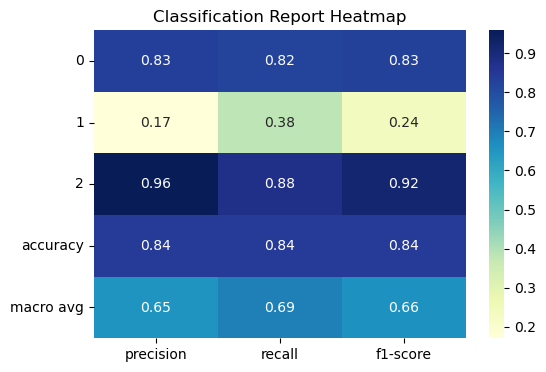

In [34]:
# Data visuaizations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
report_dict = classification_report(Y_test, Y_pred, output_dict=True, zero_division=0)

# Convert to DataFrame for visualization
report_df = pd.DataFrame(report_dict).transpose()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

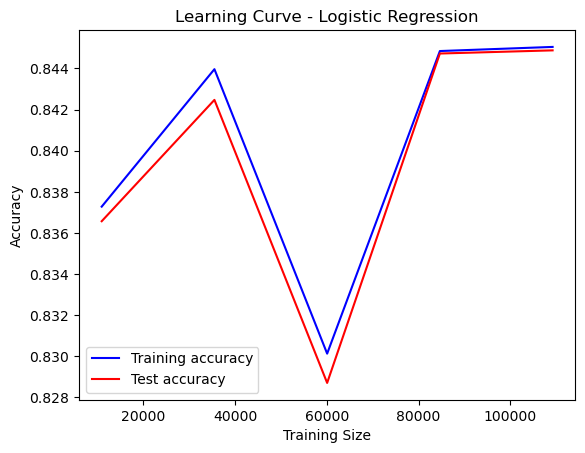

In [36]:
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, n_jobs=-1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test accuracy', color='red')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend(loc='best')
plt.show()